loss: tensor(2214438.2500, grad_fn=<MeanBackward1>)
loss: tensor(203671.0469, grad_fn=<MeanBackward1>)
loss: tensor(203630.3906, grad_fn=<MeanBackward1>)
loss: tensor(203630.4062, grad_fn=<MeanBackward1>)
loss: tensor(203630.4062, grad_fn=<MeanBackward1>)
loss: tensor(203630.3750, grad_fn=<MeanBackward1>)
loss: tensor(203630.3750, grad_fn=<MeanBackward1>)
loss: tensor(203630.3906, grad_fn=<MeanBackward1>)
loss: tensor(203630.3906, grad_fn=<MeanBackward1>)
loss: tensor(203630.4062, grad_fn=<MeanBackward1>)


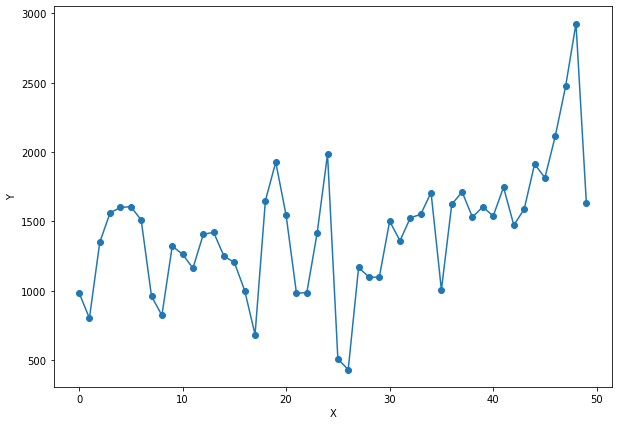

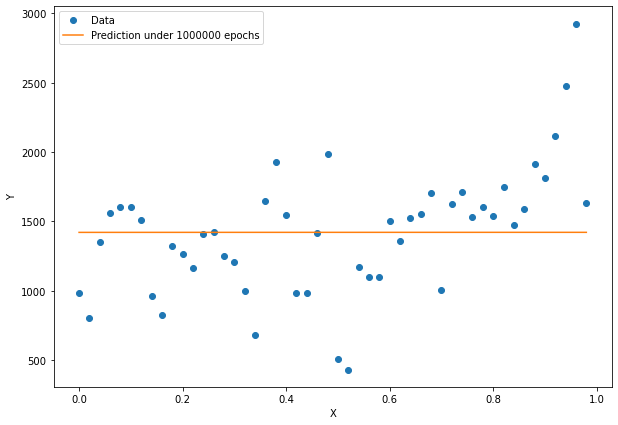

In [3]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

data_path = './hour.csv'
rides = pd.read_csv(data_path)
rides.head()
counts = rides['cnt'][:50]
x = np.arange(len(counts))
y = np.array(counts)
plt.figure(figsize=(10, 7))
plt.plot(x, y, 'o-')
plt.xlabel('X')
plt.ylabel('Y')

x = Variable(torch.FloatTensor(
    np.arange(len(counts), dtype=float)/len(counts)))
y = Variable(torch.FloatTensor(np.array(counts, dtype=float)))

sz = 10
weights = Variable(torch.randn(1, sz), requires_grad=True)
biases = Variable(torch.randn(sz), requires_grad=True)
weights2 = Variable(torch.randn(sz, 1), requires_grad=True)
learning_rate = 0.0001
losses = []
for i in range(1000000000):
    hidden = x.expand(sz, len(x)).t()*weights.expand(len(x),
                                                     sz)+biases.expand(len(x), sz)
    hidden = torch.sigmoid(hidden)
    predictions = hidden.mm(weights2)
    loss = torch.mean((predictions-y)**2)
    losses.append(loss.data.numpy())
    if i % 100000 == 0:
        print('loss:', loss)

    loss.backward()
    weights.data.add_(-learning_rate*weights.grad.data)
    biases.data.add_(-learning_rate*biases.grad.data)
    weights2.data.add_(-learning_rate*weights2.grad.data)

    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

    #plt.plot(losses)
    #plt.xlabel('Epoch')
    #plt.ylabel('loss')

    if i == (1000000000-1):
        x_data = x.data.numpy()
        plt.figure(figsize=(10, 7))
        xplot, = plt.plot(x_data, y.data.numpy(), 'o')
        yplot, = plt.plot(x_data, predictions.data.numpy())
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend([xplot, yplot], ['Data', 'Prediction under 1000000 epochs'])
    
        plt.show()